In [1]:
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.spike_recording as sr
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.normalization as norm
import spike.spike_analysis.single_cell as single_cell
import spike.spike_analysis.spike_collection as collection
import spike.spike_analysis.zscoring as zscoring
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt
import pickle
import re

In [2]:
pd.set_option('display.max_colwidth', 0)  # 0 means unlimited in newer pandas versions

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Don’t truncate column contents
pd.set_option("display.max_colwidth", None)

# Expand the display to the full width of the screen
pd.set_option("display.width", 0)


In [3]:
spike_collection_json_path = r'C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\spike_collection.json\spike_collection.json'

In [4]:
import importlib
importlib.reload(sc)
importlib.reload(zscoring)

<module 'spike.spike_analysis.zscoring' from 'c:\\Users\\thoma\\Code\\ResearchCode\\diff_fam_social_memory_ephys\\spike\\spike_analysis\\zscoring.py'>

In [5]:
sp = sc.SpikeCollection.load_collection(spike_collection_json_path)

In [6]:
rec_events = sp.recordings[0].event_dict

# get unique event names from rec_events dictionary
event_names = list(rec_events.keys())
print("Unique event names:", event_names)

Unique event names: ['alone_rewarded', 'alone_rewarded_baseline', 'high_comp', 'high_comp_lose', 'high_comp_lose_baseline', 'high_comp_win', 'high_comp_win_baseline', 'lose', 'low_comp', 'low_comp_lose', 'low_comp_lose_baseline', 'low_comp_win', 'low_comp_win_baseline', 'overall_pretone', 'win']


In [7]:
exclude_events_baseline_alone_rewarded = [ 'alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline', 'high_comp_win_baseline', 
                           'low_comp', 'low_comp_lose_baseline', 'low_comp_win_baseline', 'lose', 'win', 'overall_pretone']

In [8]:
exclude_events_baseline = [ 'alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline', 'high_comp_win_baseline', 
                           'low_comp', 'low_comp_lose_baseline', 'low_comp_win_baseline', 'lose', 'win', 'overall_pretone', 'alone_rewarded']

In [9]:
win_lose = ['win', 'lose']

In [10]:
# for each rec, what makes up the percentages of win or lose events
event_name_counts = {}
for rec in sp.recordings:
    event_dict = rec.event_dict
    total_events = sum(len(v) for k, v in event_dict.items() if k in win_lose)
    event_name_counts[rec.name] = {k: len(v) for k, v in event_dict.items() if k in win_lose}
    event_name_counts[rec.name]['total'] = total_events

# Calculate percentages
event_name_percentages = {}
for rec_name, counts in event_name_counts.items():
    event_name_percentages[rec_name] = {k: (v / counts['total'] * 100) if counts['total'] > 0 else 0
                                         for k, v in counts.items() if k != 'total'}
# Display results
for rec_name, percentages in event_name_percentages.items():
    print(f"Recording: {rec_name}")
    for event_name, percentage in percentages.items():
        print(f"  Event: {event_name}, Percentage: {percentage:.2f}%")
    print()


Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
  Event: lose, Percentage: 35.00%
  Event: win, Percentage: 65.00%

Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec
  Event: lose, Percentage: 65.00%
  Event: win, Percentage: 35.00%

Recording: 20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged.rec
  Event: lose, Percentage: 65.00%
  Event: win, Percentage: 35.00%

Recording: 20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged.rec
  Event: lose, Percentage: 35.00%
  Event: win, Percentage: 65.00%

Recording: 20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged.rec
  Event: lose, Percentage: 5.00%
  Event: win, Percentage: 95.00%

Recording: 20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec
  Event: lose, Percentage: 95.00%
  Event: win, Percentage: 5.00%

Recording: 20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_b

In [11]:
# for each rec, what makes up the percentages of events? not including those in exclude_events_baseline
event_name_counts = {}
for rec in sp.recordings:
    event_dict = rec.event_dict
    total_events = sum(len(v) for k, v in event_dict.items() if k not in exclude_events_baseline)
    event_name_counts[rec.name] = {k: len(v) for k, v in event_dict.items() if k not in exclude_events_baseline}
    event_name_counts[rec.name]['total'] = total_events

# Calculate percentages
event_name_percentages = {}
for rec_name, counts in event_name_counts.items():
    event_name_percentages[rec_name] = {k: (v / counts['total'] * 100) if counts['total'] > 0 else 0
                                         for k, v in counts.items() if k != 'total'}
# Display results
for rec_name, percentages in event_name_percentages.items():
    print(f"Recording: {rec_name}")
    for event_name, percentage in percentages.items():
        print(f"  Event: {event_name}, Percentage: {percentage:.2f}%")
    print()

Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
  Event: high_comp_lose, Percentage: 5.00%
  Event: high_comp_win, Percentage: 40.00%
  Event: low_comp_lose, Percentage: 30.00%
  Event: low_comp_win, Percentage: 25.00%

Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec
  Event: high_comp_lose, Percentage: 40.00%
  Event: high_comp_win, Percentage: 5.00%
  Event: low_comp_lose, Percentage: 25.00%
  Event: low_comp_win, Percentage: 30.00%

Recording: 20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged.rec
  Event: high_comp_lose, Percentage: 50.00%
  Event: high_comp_win, Percentage: 20.00%
  Event: low_comp_lose, Percentage: 15.00%
  Event: low_comp_win, Percentage: 15.00%

Recording: 20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged.rec
  Event: high_comp_lose, Percentage: 20.00%
  Event: high_comp_win, Percentage: 50.00%
  Event: low_comp_lose, Percentage: 15.00%
  Eve

In [12]:
i = 0
for rec in sp.recordings:
    i+=1
    print(f"{i}: {rec.name}")

1: 20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
2: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec
3: 20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged.rec
4: 20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged.rec
5: 20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged.rec
6: 20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec
7: 20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec
8: 20230614_114041_standard_comp_to_training_D3_subj_1-2_t2b2L_box2_merged.rec
9: 20230616_111904_standard_comp_to_training_D4_subj_1-2_t2b2L_box2_merged.rec
10: 20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec
11: 20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec
12: 20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged.rec
13: 20230618_100636_standard_comp_to_omission_D2_

# Global PSTH

In [13]:
import numpy as np
import pandas as pd

def run_zscore_global_baseline_psth(recording, event_name, pre_window=10, equalize=10, timebin=0.25, SD=1.65, verbose=False):
    """
    Z-score event firing rates using a global pooled baseline per unit with PSTH-like averaging.
    Computes baseline across all non-excluded events, averaging across trials per timebin, then across timebins.
    Event firing rates are similarly averaged using PSTH method.

    Parameters
    ----------
    recording : SpikeRecording
        SpikeRecording object with spike data and event_dict.
    event_name : str
        Event type to analyze.
    pre_window : float
        Duration (s) before events to use for baseline extraction.
    equalize : float
        Duration (s) of event window to analyze.
    timebin : float
        Bin width (s) for PSTH computation (default 0.25s = 250ms).
    SD : float
        Threshold in SD units for significance classification.
    verbose : bool
        Print debug info if True.

    Returns
    -------
    df : pd.DataFrame
        Per-unit z-scores with global baseline and PSTH-based event rates.
    """
    # --- Step 1: Identify good units ---
    units = getattr(recording, "good_units", None)
    if units is None:
        units = [u for u, label in recording.labels_dict.items() if label == "good"]
        if verbose:
            print("Using labels_dict for good units:", units)

    # Define events to exclude from baseline
    exclude_events_baseline = [
        'alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline',
        'high_comp_win_baseline', 'low_comp', 'low_comp_lose_baseline',
        'low_comp_win_baseline', 'lose', 'win', 'overall_pretone'
    ]

    timebin_ms = timebin * 1000
    sampling_rate = recording.sampling_rate

    # --- Step 2: Compute GLOBAL baseline firing rates (PSTH-like) ---
    global_baseline_matrices = {u: [] for u in units}

    for ev_type, ev_windows in recording.event_dict.items():
        if ev_type in exclude_events_baseline:
            continue
        for unit_id in units:
            spikes_ms = recording.unit_timestamps[unit_id] * (1000 / sampling_rate)
            for w in ev_windows:
                start_baseline = w[0] - pre_window * 1000
                end_baseline = w[0]
                baseline_bins = np.arange(start_baseline, end_baseline + timebin_ms, timebin_ms)
                spike_counts = np.histogram(spikes_ms, bins=baseline_bins)[0]
                firing_rate = spike_counts * (1000 / timebin_ms)  # Hz
                global_baseline_matrices[unit_id].append(firing_rate)

                if verbose:
                    print(f"[{recording.name}] Unit {unit_id} | Baseline Event {ev_type}, Window {w}")
                    print(f"Baseline firing rates: {firing_rate}\n")

    # --- Step 3: Compute EVENT firing rates (PSTH-like) ---
    event_fr_matrices = {u: [] for u in units}
    event_windows = recording.event_dict[event_name]

    for unit_id in units:
        spikes_ms = recording.unit_timestamps[unit_id] * (1000 / sampling_rate)
        for w in event_windows:
            start_event = w[0]
            end_event = min(w[1], start_event + equalize * 1000)
            event_bins = np.arange(start_event, end_event + timebin_ms, timebin_ms)
            spike_counts = np.histogram(spikes_ms, bins=event_bins)[0]
            firing_rate = spike_counts * (1000 / timebin_ms)  # Hz
            event_fr_matrices[unit_id].append(firing_rate)

            if verbose:
                print(f"[{recording.name}] Unit {unit_id} | Event {event_name}, Window {w}")
                print(f"Event firing rates: {firing_rate}\n")

    # --- Step 4: Compute mean and SD for baseline and event per unit ---
    rows = []
    for unit_id in units:
        baseline_fr_matrix = np.array(global_baseline_matrices[unit_id])  # Shape: trials × bins
        event_fr_matrix = np.array(event_fr_matrices[unit_id])

        if verbose:
            print(f"Event name: {event_name}")
            print(f"Baseline FR matrix shape for unit {unit_id}: {baseline_fr_matrix.shape}")
            print(f"Baseline FR matrix for unit {unit_id}:\n{baseline_fr_matrix}\n")
            print(f"Event FR matrix shape for unit {unit_id}: {event_fr_matrix.shape}")
            print(f"Event FR matrix for unit {unit_id}:\n{event_fr_matrix}\n")

        if baseline_fr_matrix.size == 0 or event_fr_matrix.size == 0:
            b_mean = np.nan
            b_sd = np.nan
            ev_mean = np.nan
            zscore = np.nan
        else:
            # Handle inconsistent bin counts by trimming to shortest
            if len(set(len(row) for row in global_baseline_matrices[unit_id])) > 1:
                min_bins = min(len(row) for row in global_baseline_matrices[unit_id])
                baseline_fr_matrix = baseline_fr_matrix[:, :min_bins]
                if verbose:
                    print(f"Trimming baseline matrix for unit {unit_id} to {min_bins} bins")
            if len(set(len(row) for row in event_fr_matrices[unit_id])) > 1:
                min_bins = min(len(row) for row in event_fr_matrices[unit_id])
                event_fr_matrix = event_fr_matrix[:, :min_bins]
                if verbose:
                    print(f"Trimming event matrix for unit {unit_id} to {min_bins} bins")

            # Baseline mean: mean across trials per bin, then mean across bins
            b_mean_per_bin = np.mean(baseline_fr_matrix, axis=0)
            b_mean = np.mean(b_mean_per_bin) if len(b_mean_per_bin) > 0 else np.nan

            # Baseline SD: SD across trials per bin, then mean across bins
            
            # b_sd_per_bin = np.std(baseline_fr_matrix, axis=0, ddof=1)
            # b_sd = np.mean(b_sd_per_bin) if len(b_sd_per_bin) > 0 else np.nan

            b_var_per_bin = np.var(baseline_fr_matrix, axis=0, ddof=1)
            b_sd = np.sqrt(np.mean(b_var_per_bin))   # pooled across bins


            # Event mean: mean across trials per bin, then mean across bins
            ev_mean_per_bin = np.mean(event_fr_matrix, axis=0)
            ev_mean = np.mean(ev_mean_per_bin) if len(ev_mean_per_bin) > 0 else np.nan

            # Z-score
            zscore = np.nan if np.isnan(b_sd) or b_sd == 0 else (ev_mean - b_mean) / b_sd

        rows.append({
            "Recording": recording.name,
            "Event name": event_name,
            "Unit number": unit_id,
            "Global Pre-event M": b_mean,
            "Global Pre-event SD": b_sd,
            "Event M": ev_mean,
            "Event Z-Score": zscore,
        })

    # Create DataFrame
    df = pd.DataFrame(rows)

    # --- Step 5: Significance threshold ---
    df["sig"] = np.select(
        [df["Event Z-Score"] > SD, df["Event Z-Score"] < -SD],
        ["increase", "decrease"],
        default="not sig"
    )

    return df

In [14]:
# Example usage with the wrapper function
def run_all_recordings_all_events_global_psth(sp, pre_window=10, equalize=10, timebin=0.25, SD=1.65, verbose=False):
    all_event_names = sorted({ev for rec in sp.recordings for ev in rec.event_dict.keys()})
    dfs = []
    skipped = []

    for rec in sp.recordings:
        for ev in all_event_names:

            if ev not in rec.event_dict or len(rec.event_dict[ev]) == 0:
                skipped.append((rec.name, ev, "no windows"))
                continue
            try:
                df_ev = run_zscore_global_baseline_psth(
                    recording=rec,
                    event_name=ev,
                    pre_window=pre_window,
                    equalize=equalize,
                    timebin=timebin,
                    SD=SD,
                    verbose=verbose
                )
                if not df_ev.empty:
                    df_ev["Event windows"] = len(rec.event_dict[ev])
                    dfs.append(df_ev)
                else:
                    skipped.append((rec.name, ev, "empty result"))
            except Exception as e:
                skipped.append((rec.name, ev, f"error: {e}"))

    big_df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()
    skipped_df = pd.DataFrame(skipped, columns=["Recording", "Event name", "reason"])
    return big_df, skipped_df

# Run the analysis
big_df, skipped = run_all_recordings_all_events_global_psth(sp, pre_window=10, equalize=10, timebin=0.25, SD=1.65, verbose=False)
print(f"big_df shape: {big_df.shape}")
print(f"Skipped counts: {skipped.shape[0]}")
print(f"# sig: {big_df['sig'].value_counts()}")
'''
big_df.to_csv(
    "C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp/outputs/zscores_global_baseline.csv",
    index=False
)
'''


big_df shape: (6677, 9)
Skipped counts: 228
# sig: sig
not sig     6614
increase      63
Name: count, dtype: int64


'\nbig_df.to_csv(\n    "C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp/outputs/zscores_global_baseline.csv",\n    index=False\n)\n'

In [15]:
big_df.head()

,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Event M,Event Z-Score,sig,Event windows
0,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,104,0.093333,0.675813,0.075,-0.027128,not sig,40
1,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,11,0.436667,1.733876,0.270,-0.096124,not sig,40
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,0.053333,0.486194,0.185,0.270811,not sig,40
3,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,125,0.708333,2.031920,0.690,-0.009023,not sig,40
4,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,126,3.223333,5.619800,3.215,-0.001483,not sig,40


In [16]:
big_df['sig'].value_counts()

sig
not sig     6614
increase      63
Name: count, dtype: int64

In [17]:
global_sig = big_df[big_df['sig'] != 'not sig']

In [18]:
al_r = global_sig.query('''`Event name` == 'alone_rewarded' ''')
al_r.head(8)

,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Event M,Event Z-Score,sig,Event windows
336,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,52,0.598333,2.049638,4.370000,1.840162,increase,40
339,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,68,0.025000,0.368996,1.030000,2.723605,increase,40
1126,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,alone_rewarded,107,0.451667,1.487917,7.190000,4.528701,increase,40
1135,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,alone_rewarded,190,0.005000,0.140620,0.470000,3.306782,increase,40
2578,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,alone_rewarded,104,0.150847,0.861271,1.689744,1.786773,increase,39
2579,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,alone_rewarded,108,0.359322,1.580640,7.179487,4.314813,increase,39
2583,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,alone_rewarded,23,0.301695,1.493019,3.630769,2.229760,increase,39
2586,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,alone_rewarded,64,0.693220,1.762921,3.707692,1.709930,increase,39


In [19]:
hcw_global = global_sig.query('''`Event name` == 'high_comp_win' ''')
hcw_global.head(7)

,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Event M,Event Z-Score,sig,Event windows
386,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,high_comp_win,52,0.598333,2.049638,5.7,2.489057,increase,1
2653,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,high_comp_win,104,0.150847,0.861271,1.7,1.798681,increase,1
2654,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,high_comp_win,108,0.359322,1.580640,5.9,3.505339,increase,1
2658,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,high_comp_win,23,0.301695,1.493019,4.9,3.079870,increase,1
5678,20240322_120625_alone_comp_subj_3-3_t6b6_merged.rec,high_comp_win,101,2.646032,4.997224,12.3,1.931866,increase,1
5692,20240322_120625_alone_comp_subj_3-3_t6b6_merged.rec,high_comp_win,89,2.246032,4.488365,10.3,1.794410,increase,1
6127,20240323_144517_alone_comp_subj_3-1_t5b5_merged.rec,high_comp_win,4,25.688889,13.129510,47.4,1.653612,increase,1


In [20]:
lcw_global = global_sig.query("`Event name` == 'low_comp_win'")
lcw_global.head(6)

,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Event M,Event Z-Score,sig,Event windows
446,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,low_comp_win,52,0.598333,2.049638,4.800000,2.049955,increase,6
449,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,low_comp_win,68,0.025000,0.368996,0.983333,2.597136,increase,6
2744,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,low_comp_win,108,0.359322,1.580640,5.740000,3.404114,increase,5
2748,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,low_comp_win,23,0.301695,1.493019,2.960000,1.780490,increase,5
3535,20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec,low_comp_win,187,0.963158,2.450922,5.575000,1.881677,increase,4
6612,20240323_165815_alone_comp_subj_4-2_t5b5_merged.rec,low_comp_win,24,1.851667,4.875825,10.400000,1.753207,increase,3


In [21]:
hcl_global = global_sig.query('''`Event name` == 'high_comp_lose' ''')
hcl_global.head(9)

,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Event M,Event Z-Score,sig,Event windows
767,20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged.rec,high_comp_lose,14,7.280000,9.252650,25.800000,2.001589,increase,4
1200,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,high_comp_lose,107,0.451667,1.487917,4.254545,2.555840,increase,11
2356,20230616_111904_standard_comp_to_training_D4_subj_1-2_t2b2L_box2_merged.rec,high_comp_lose,180,0.672881,2.137145,5.600000,2.305468,increase,1
3463,20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec,high_comp_lose,187,0.963158,2.450922,5.283333,1.762674,increase,12
3474,20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec,high_comp_lose,275,0.315789,1.338586,2.641667,1.737563,increase,12
3869,20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec,high_comp_lose,84,1.315000,2.981169,7.930000,2.218928,increase,10
5772,20240322_120625_alone_comp_subj_3-4_t5b5_merged.rec,high_comp_lose,49,0.301587,1.564061,3.200000,1.853132,increase,1
5773,20240322_120625_alone_comp_subj_3-4_t5b5_merged.rec,high_comp_lose,8,7.331746,7.900521,20.600000,1.679415,increase,1
6296,20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec,high_comp_lose,7,0.431746,1.700456,3.600000,1.863179,increase,1


In [22]:
lcl_global = global_sig.query('''`Event name` == 'low_comp_lose' ''')
lcl_global.head(5)

,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Event M,Event Z-Score,sig,Event windows
1088,20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged.rec,low_comp_lose,479,0.605000,1.801161,4.9,2.384573,increase,1
1709,20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec,low_comp_lose,229,0.394828,1.432954,4.7,3.004404,increase,1
6356,20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec,low_comp_lose,3,6.565079,5.945649,19.2,2.125070,increase,1
6358,20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec,low_comp_lose,4,12.893651,8.184909,32.1,2.346556,increase,1
6359,20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec,low_comp_lose,7,0.431746,1.700456,13.7,7.802761,increase,1


In [23]:
excluded_sig = global_sig[~global_sig['Event name'].isin(exclude_events_baseline_alone_rewarded)]
len(excluded_sig)

38

In [24]:
# showing number of significant units per event
sig_counts = global_sig.groupby(['Event name', 'sig']).size().unstack()
sig_counts.head(20)

# print out sig counts for each event
print(f"{sig_counts}")

sig                      increase
Event name                       
alone_rewarded                  8
alone_rewarded_baseline         1
high_comp                       4
high_comp_lose                  9
high_comp_lose_baseline         1
high_comp_tie                   3
high_comp_win                   7
high_comp_win_baseline          1
lose                            6
low_comp                        2
low_comp_lose                   5
low_comp_lose_baseline          1
low_comp_win                    6
low_comp_win_baseline           1
overall_pretone                 1
win                             7


In [25]:
excluded_sig_specific = sig_specific_event_df[~sig_specific_event_df['Event name'].isin(exclude_events_baseline_alone_rewarded)]
print("Total neurons (event-specific baseline, excluded events):", len(excluded_sig_specific))
print(f"Unique neurons: {excluded_sig_specific['Recording'].nunique()} recordings, {excluded_sig_specific['Unit number'].nunique()} units")

NameError: name 'sig_specific_event_df' is not defined

In [ ]:
# Explanation of the difference between 38 and 27 neurons
print("=== EXPLANATION OF NEURON COUNTING DIFFERENCE ===")
print()

excluded_sig = global_sig[~global_sig['Event name'].isin(exclude_events_baseline_alone_rewarded)]
print(f"Total neuron-event combinations (rows): {len(excluded_sig)}")
print(f"Unique neurons across all recordings: {excluded_sig['Unit number'].nunique()}")
print()

# Show how many times each neuron appears (i.e., significant for multiple events)
neuron_event_counts = excluded_sig.groupby(['Recording', 'Unit number']).size().reset_index(name='num_events')
neurons_with_multiple_events = neuron_event_counts[neuron_event_counts['num_events'] > 1]

print(f"Neurons significant for multiple events: {len(neurons_with_multiple_events)}")
print()

if len(neurons_with_multiple_events) > 0:
    print("Neurons significant for multiple events:")
    for _, row in neurons_with_multiple_events.iterrows():
        print(f"  Recording: {row['Recording']}, Unit {row['Unit number']}: {row['num_events']} events")
        # Show which events
        neuron_events = excluded_sig[(excluded_sig['Recording'] == row['Recording']) & 
                                   (excluded_sig['Unit number'] == row['Unit number'])]
        events = neuron_events['Event name'].tolist()
        print(f"    Events: {', '.join(events)}")
        print()

print("This explains the difference:")
print(f"  - 38 = total neuron-event combinations")
print(f"  - 27 = unique neurons (each counted once regardless of how many events)")

# Verify the calculation
unique_neurons_per_recording = excluded_sig.groupby('Recording')['Unit number'].nunique().sum()
print(f"  - Verification: {unique_neurons_per_recording} unique neurons total")

=== EXPLANATION OF NEURON COUNTING DIFFERENCE ===

Total neuron-event combinations (rows): 38
Unique neurons across all recordings: 25

Neurons significant for multiple events: 8

Neurons significant for multiple events:
  Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec, Unit 52: 3 events
    Events: alone_rewarded, high_comp_win, low_comp_win

  Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec, Unit 68: 2 events
    Events: alone_rewarded, low_comp_win

  Recording: 20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec, Unit 107: 2 events
    Events: alone_rewarded, high_comp_lose

  Recording: 20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec, Unit 104: 2 events
    Events: alone_rewarded, high_comp_win

  Recording: 20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec, Unit 108: 3 events
    Events: alone_rewarded, high_comp_win, low_com

In [ ]:
# Count good neurons for each recording type
import re

def categorize_recording(recording_name):
    """Categorize recording based on name patterns"""
    if 'alone_comp' in recording_name:
        return 'alone_comp'
    elif 'long_comp' in recording_name:
        return 'long_comp'
    elif 'standard_comp_to_omission' in recording_name:
        return 'standard_comp_to_omission'
    elif 'standard_comp_to_training' in recording_name:
        return 'standard_comp_to_training'
    else:
        return 'other'

# Count good neurons per recording and categorize
recording_neuron_counts = {}
recording_categories = {}

for rec in sp.recordings:
    # Get good units for this recording
    units = getattr(rec, "good_units", None)
    if units is None:
        units = [unit_id for unit_id, label in rec.labels_dict.items() if label == "good"]
    
    num_good_neurons = len(units)
    category = categorize_recording(rec.name)
    
    recording_neuron_counts[rec.name] = num_good_neurons
    recording_categories[rec.name] = category

# Group by category and calculate totals
category_totals = {}
category_recordings = {}

for rec_name, count in recording_neuron_counts.items():
    category = recording_categories[rec_name]
    
    if category not in category_totals:
        category_totals[category] = 0
        category_recordings[category] = []
    
    category_totals[category] += count
    category_recordings[category].append((rec_name, count))

# Print results
print("=== GOOD NEURONS COUNT BY RECORDING TYPE ===")
print()

for category in ['alone_comp', 'long_comp', 'standard_comp_to_omission', 'other']:
    if category in category_totals:
        print(f"📊 {category.upper()}")
        print(f"Total good neurons: {category_totals[category]}")
        print(f"Number of recordings: {len(category_recordings[category])}")
        print()
        
        for rec_name, count in category_recordings[category]:
            print(f"  • {rec_name}: {count} neurons")
        
        print("-" * 80)
        print()

# Summary table
print("=== SUMMARY ===")
total_neurons = sum(category_totals.values())
total_recordings = sum(len(recs) for recs in category_recordings.values())

for category in ['alone_comp', 'long_comp', 'standard_comp_to_omission', 'standard_comp_to_training', 'other']:
    if category in category_totals:
        neurons = category_totals[category]
        recordings = len(category_recordings[category])
        avg_per_recording = neurons / recordings if recordings > 0 else 0
        
        print(f"{category:<25} | {recordings:>3} recordings | {neurons:>4} neurons | {avg_per_recording:>5.1f} avg/rec")

print(f"{'TOTAL':<25} | {total_recordings:>3} recordings | {total_neurons:>4} neurons | {total_neurons/total_recordings:>5.1f} avg/rec")

=== GOOD NEURONS COUNT BY RECORDING TYPE ===

📊 ALONE_COMP
Total good neurons: 146
Number of recordings: 11

  • 20240320_142408_alone_comp_subj_3-1_t6b6_merged.rec: 15 neurons
  • 20240320_142408_alone_comp_subj_3-3_t5b5_merged.rec: 10 neurons
  • 20240320_171038_alone_comp_subj_4-2_t6b6_merged.rec: 6 neurons
  • 20240320_171038_alone_comp_subj_4-3_t5b5_merged.rec: 23 neurons
  • 20240322_120625_alone_comp_subj_3-3_t6b6_merged.rec: 15 neurons
  • 20240322_120625_alone_comp_subj_3-4_t5b5_merged.rec: 7 neurons
  • 20240322_160946_alone_comp_subj_4-3_t6b6_merged.rec: 24 neurons
  • 20240323_122227_alone_comp_subj_5-2_t6b6_merged.rec: 6 neurons
  • 20240323_144517_alone_comp_subj_3-1_t5b5_merged.rec: 14 neurons
  • 20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec: 9 neurons
  • 20240323_165815_alone_comp_subj_4-2_t5b5_merged.rec: 17 neurons
--------------------------------------------------------------------------------

📊 LONG_COMP
Total good neurons: 136
Number of recordings: 10

  •

In [ ]:
# Find neurons that are significant across ALL non-excluded events
print("=== NEURONS PRESENT IN ALL NON-EXCLUDED EVENTS ===")
print()

# Get the excluded events list
excluded_events = exclude_events_baseline_alone_rewarded
print(f"Excluded events: {excluded_events}")
print()

# Filter global_sig to only include non-excluded events
non_excluded_sig = global_sig[~global_sig['Event name'].isin(excluded_events)]

# Get all unique non-excluded events
unique_non_excluded_events = sorted(non_excluded_sig['Event name'].unique())
print(f"Non-excluded events ({len(unique_non_excluded_events)}): {unique_non_excluded_events}")
print()

# For each neuron (Recording + Unit number), count how many different events it's significant for
neuron_event_coverage = non_excluded_sig.groupby(['Recording', 'Unit number'])['Event name'].nunique().reset_index()
neuron_event_coverage.columns = ['Recording', 'Unit number', 'num_events_significant']

# Find neurons that are significant for ALL non-excluded events
total_non_excluded_events = len(unique_non_excluded_events)
neurons_in_all_events = neuron_event_coverage[neuron_event_coverage['num_events_significant'] == total_non_excluded_events]

print(f"Total non-excluded events: {total_non_excluded_events}")
print(f"Neurons significant in ALL {total_non_excluded_events} non-excluded events: {len(neurons_in_all_events)}")
print()

if len(neurons_in_all_events) > 0:
    print("🌟 NEURONS SIGNIFICANT IN ALL NON-EXCLUDED EVENTS:")
    for _, row in neurons_in_all_events.iterrows():
        print(f"  • Recording: {row['Recording']}, Unit {row['Unit number']}")
        
        # Show the specific events and their z-scores for this neuron
        neuron_data = non_excluded_sig[
            (non_excluded_sig['Recording'] == row['Recording']) & 
            (non_excluded_sig['Unit number'] == row['Unit number'])
        ].sort_values('Event name')
        
        print(f"    Events and Z-scores:")
        for _, event_row in neuron_data.iterrows():
            zscore = event_row['Event Z-Score']
            sig_type = event_row['sig']
            print(f"      - {event_row['Event name']}: Z={zscore:.3f} ({sig_type})")
        print()
else:
    print("❌ No neurons are significant in ALL non-excluded events")
    print()
    
    # Show distribution of how many events each neuron is significant for
    print("📊 Distribution of event coverage per neuron:")
    coverage_dist = neuron_event_coverage['num_events_significant'].value_counts().sort_index()
    for num_events, count in coverage_dist.items():
        print(f"  {num_events} events: {count} neurons")
    
    print()
    
    # Show neurons with highest coverage
    max_coverage = neuron_event_coverage['num_events_significant'].max()
    print(f"🏆 Neurons with highest coverage ({max_coverage} out of {total_non_excluded_events} events):")
    top_neurons = neuron_event_coverage[neuron_event_coverage['num_events_significant'] == max_coverage]
    
    for _, row in top_neurons.iterrows():
        print(f"  • Recording: {row['Recording']}, Unit {row['Unit number']} ({row['num_events_significant']} events)")
        
        # Show which events this neuron is significant for
        neuron_data = non_excluded_sig[
            (non_excluded_sig['Recording'] == row['Recording']) & 
            (non_excluded_sig['Unit number'] == row['Unit number'])
        ].sort_values('Event name')
        
        sig_events = neuron_data['Event name'].tolist()
        missing_events = [e for e in unique_non_excluded_events if e not in sig_events]
        
        print(f"    Significant for: {', '.join(sig_events)}")
        if missing_events:
            print(f"    Missing from: {', '.join(missing_events)}")
        print()

=== NEURONS PRESENT IN ALL NON-EXCLUDED EVENTS ===

Excluded events: ['alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline', 'high_comp_win_baseline', 'low_comp', 'low_comp_lose_baseline', 'low_comp_win_baseline', 'lose', 'win', 'overall_pretone']

Non-excluded events (6): ['alone_rewarded', 'high_comp_lose', 'high_comp_tie', 'high_comp_win', 'low_comp_lose', 'low_comp_win']

Total non-excluded events: 6
Neurons significant in ALL 6 non-excluded events: 0

❌ No neurons are significant in ALL non-excluded events

📊 Distribution of event coverage per neuron:
  1 events: 19 neurons
  2 events: 5 neurons
  3 events: 3 neurons

🏆 Neurons with highest coverage (3 out of 6 events):
  • Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec, Unit 52 (3 events)
    Significant for: alone_rewarded, high_comp_win, low_comp_win
    Missing from: high_comp_lose, high_comp_tie, low_comp_lose

  • Recording: 20230616_111904_standard_comp_to_training_D4_subj

In [ ]:
# Detailed analysis of the top 3 neurons with highest event coverage
print("=== DETAILED ANALYSIS OF TOP NEURONS ===")
print()

# Get the top neurons (those with 3 events)
top_neurons = neuron_event_coverage[neuron_event_coverage['num_events_significant'] == 3]

for i, (_, neuron_row) in enumerate(top_neurons.iterrows(), 1):
    recording = neuron_row['Recording']
    unit_num = neuron_row['Unit number']
    
    print(f"🧠 NEURON {i}:")
    print(f"   Recording: {recording}")
    print(f"   Unit: {unit_num}")
    print(f"   Recording type: {categorize_recording(recording)}")
    print()
    
    # Get all data for this neuron across all non-excluded events
    neuron_data = non_excluded_sig[
        (non_excluded_sig['Recording'] == recording) & 
        (non_excluded_sig['Unit number'] == unit_num)
    ].sort_values('Event name')
    
    print(f"   📊 Significant Events ({len(neuron_data)}/6):")
    for _, event_row in neuron_data.iterrows():
        event_name = event_row['Event name']
        zscore = event_row['Event Z-Score']
        sig_type = event_row['sig']
        pre_mean = event_row['Global Pre-event M']
        event_mean = event_row['Event M']
        
        direction = "↑" if sig_type == "increase" else "↓"
        print(f"     {direction} {event_name}: Z={zscore:.3f} ({sig_type})")
        print(f"       Baseline: {pre_mean:.2f} Hz → Event: {event_mean:.2f} Hz")
    
    # Check if this neuron appears in the global_sig data for excluded events
    neuron_excluded_events = global_sig[
        (global_sig['Recording'] == recording) & 
        (global_sig['Unit number'] == unit_num) & 
        (global_sig['Event name'].isin(excluded_events))
    ]
    
    if len(neuron_excluded_events) > 0:
        print(f"   ⚠️  Also significant in excluded events:")
        for _, event_row in neuron_excluded_events.iterrows():
            event_name = event_row['Event name']
            zscore = event_row['Event Z-Score']
            sig_type = event_row['sig']
            direction = "↑" if sig_type == "increase" else "↓"
            print(f"     {direction} {event_name}: Z={zscore:.3f} ({sig_type})")
    
    print()
    print("-" * 80)
    print()

# Summary of patterns
print("=== PATTERN SUMMARY ===")
print("All 3 top neurons show the same pattern:")
print("✅ Significant for: alone_rewarded, high_comp_win, low_comp_win")
print("❌ Not significant for: high_comp_lose, high_comp_tie, low_comp_lose")
print()
print("🎯 Pattern interpretation:")
print("   • These neurons respond to WINNING events (both high and low competition)")
print("   • They also respond to alone_rewarded (non-competitive reward)")
print("   • They do NOT respond significantly to losing or tie events")
print("   • This suggests these might be 'reward-responsive' or 'success-responsive' neurons")

=== DETAILED ANALYSIS OF TOP NEURONS ===

🧠 NEURON 1:
   Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec
   Unit: 52
   Recording type: standard_comp_to_training

   📊 Significant Events (3/6):
     ↑ alone_rewarded: Z=1.840 (increase)
       Baseline: 0.60 Hz → Event: 4.37 Hz
     ↑ high_comp_win: Z=2.489 (increase)
       Baseline: 0.60 Hz → Event: 5.70 Hz
     ↑ low_comp_win: Z=2.050 (increase)
       Baseline: 0.60 Hz → Event: 4.80 Hz
   ⚠️  Also significant in excluded events:
     ↑ win: Z=2.113 (increase)

--------------------------------------------------------------------------------

🧠 NEURON 2:
   Recording: 20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec
   Unit: 108
   Recording type: standard_comp_to_training

   📊 Significant Events (3/6):
     ↑ alone_rewarded: Z=4.315 (increase)
       Baseline: 0.36 Hz → Event: 7.18 Hz
     ↑ high_comp_win: Z=3.505 (increase)
       Baseline: 0.36 Hz → Event: 5.90 Hz
 

=== CREATING NEURON-EVENT SIGNIFICANCE HEATMAP (Improved Grouping & Colors) ===


C:\Users\thoma\AppData\Local\Temp\ipykernel_23748\548987431.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_map_exclude_sig['Neuron_ID'] = (


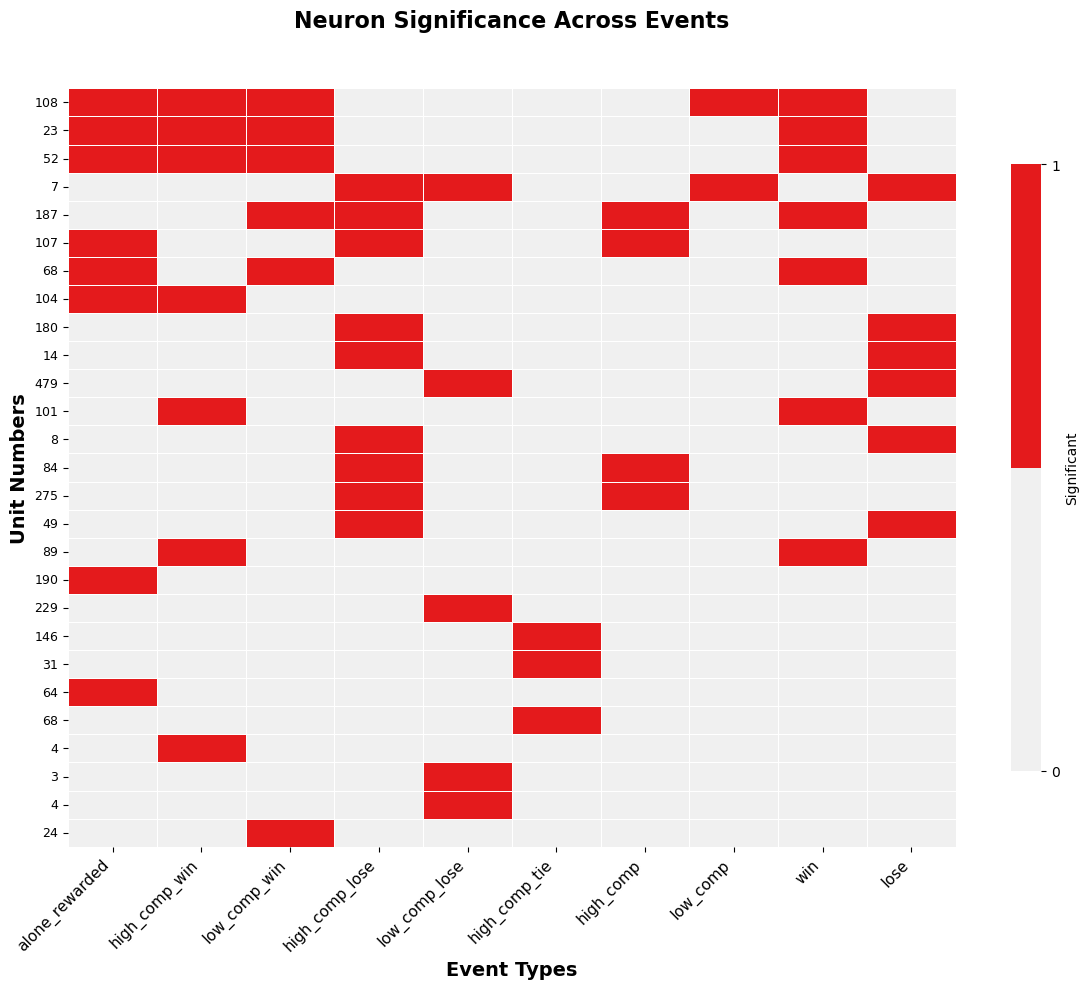

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("=== CREATING NEURON-EVENT SIGNIFICANCE HEATMAP (Improved Grouping & Colors) ===")

heatmap_exclude_events = [ 'alone_rewarded_baseline', 'high_comp_lose_baseline', 'high_comp_win_baseline', 
                           'low_comp_lose_baseline', 'low_comp_win_baseline', 'overall_pretone']

# Copy to avoid warnings
heat_map_exclude_sig = global_sig[~global_sig['Event name'].isin(heatmap_exclude_events)]

# Unique neuron ID
heat_map_exclude_sig['Neuron_ID'] = (
    heat_map_exclude_sig['Recording'].astype(str) +
    '_Unit_' + heat_map_exclude_sig['Unit number'].astype(str)
)

# Pivot for heatmap
heatmap_data = heat_map_exclude_sig.pivot_table(
    index='Neuron_ID',
    columns='Event name',
    values='Event Z-Score',
    fill_value=0
)

# Binary significance
significance_data = (heatmap_data != 0).astype(int)

# Order neurons by number of sig events
neuron_event_counts = significance_data.sum(axis=1).sort_values(ascending=False)
significance_data_sorted = significance_data.loc[neuron_event_counts.index]

# === Custom event ordering ===
# Put wins + alone_rewarded together, then losses, then ties
event_order = [
    "alone_rewarded",
    "high_comp_win", "low_comp_win",
    "high_comp_lose", "low_comp_lose",
    "high_comp_tie", "high_comp", "low_comp", "win", "lose"
]
# Reorder columns if they exist in data
event_order = [e for e in event_order if e in significance_data_sorted.columns]
significance_data_sorted = significance_data_sorted[event_order]

# Simpler y-axis labels
unit_labels = [neuron_id.split('_Unit_')[-1] for neuron_id in significance_data_sorted.index]

# === Plotting ===
plt.figure(figsize=(12, 10))

# Discrete colormap: gray (not sig) → bright red (sig)
cmap = sns.color_palette(["#f0f0f0", "#e41a1c"])  # light gray + strong red

sns.heatmap(significance_data_sorted,
            cmap=cmap,
            cbar_kws={'label': 'Significant', 'shrink': 0.8, 'ticks': [0, 1]},
            xticklabels=True,
            yticklabels=unit_labels,
            linewidths=0.5,
            linecolor='white',
            square=False,
            annot=False)


plt.title('Neuron Significance Across Events\n',
          fontsize=16, pad=25, fontweight='bold')
plt.xlabel('Event Types', fontsize=14, fontweight='bold')
plt.ylabel('Unit Numbers', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=9)

# Clean frame
for side in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[side].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
# Count significant neurons by recording type, excluding baseline events
print("=== SIGNIFICANT NEURONS BY RECORDING TYPE (Excluding Baseline Events) ===")
print()

# Filter out neurons from excluded baseline events
filtered_sig_specific = sig_specific_event_df[~sig_specific_event_df['Event name'].isin(exclude_events_baseline_alone_rewarded)]
filtered_global_sig = global_sig[~global_sig['Event name'].isin(exclude_events_baseline_alone_rewarded)]

print(f"Excluded events: {exclude_events_baseline_alone_rewarded}")
print()

# Count significant neurons by recording type for event-specific baseline
print("📊 EVENT-SPECIFIC BASELINE ANALYSIS:")
print(f"Total significant neurons (after filtering): {len(filtered_sig_specific)}")
print()

# Group by recording and count unique units, then categorize
event_specific_counts = {}
for recording_name in filtered_sig_specific['Recording'].unique():
    rec_data = filtered_sig_specific[filtered_sig_specific['Recording'] == recording_name]
    unique_units = rec_data['Unit number'].nunique()  # Count unique units per recording
    category = categorize_recording(recording_name)
    
    if category not in event_specific_counts:
        event_specific_counts[category] = {'total_sig_neurons': 0, 'recordings': []}
    
    event_specific_counts[category]['total_sig_neurons'] += unique_units
    event_specific_counts[category]['recordings'].append((recording_name, unique_units))

# Print event-specific results
for category in ['alone_comp', 'long_comp', 'standard_comp_to_omission', 'standard_comp_to_training', 'other']:
    if category in event_specific_counts:
        data = event_specific_counts[category]
        print(f"  {category.upper()}:")
        print(f"    Total significant neurons: {data['total_sig_neurons']}")
        print(f"    Number of recordings: {len(data['recordings'])}")
        for rec_name, count in data['recordings']:
            print(f"      • {rec_name}: {count} sig neurons")
        print()

print("-" * 80)

# Count significant neurons by recording type for global baseline
print("📊 GLOBAL BASELINE ANALYSIS:")
print(f"Total significant neurons (after filtering): {len(filtered_global_sig)}")
print()

global_counts = {}
for recording_name in filtered_global_sig['Recording'].unique():
    rec_data = filtered_global_sig[filtered_global_sig['Recording'] == recording_name]
    unique_units = rec_data['Unit number'].nunique()  # Count unique units per recording
    category = categorize_recording(recording_name)
    
    if category not in global_counts:
        global_counts[category] = {'total_sig_neurons': 0, 'recordings': []}
    
    global_counts[category]['total_sig_neurons'] += unique_units
    global_counts[category]['recordings'].append((recording_name, unique_units))

# Print global baseline results
for category in ['alone_comp', 'long_comp', 'standard_comp_to_omission', 'standard_comp_to_training', 'other']:
    if category in global_counts:
        data = global_counts[category]
        print(f"  {category.upper()}:")
        print(f"    Total significant neurons: {data['total_sig_neurons']}")
        print(f"    Number of recordings: {len(data['recordings'])}")
        for rec_name, count in data['recordings']:
            print(f"      • {rec_name}: {count} sig neurons")
        print()

print("-" * 80)

# Summary comparison
print("=== COMPARISON SUMMARY ===")
print(f"{'Recording Type':<25} | {'Event-Specific':<15} | {'Global Baseline':<15}")
print("-" * 60)

all_categories = set(list(event_specific_counts.keys()) + list(global_counts.keys()))
for category in ['alone_comp', 'long_comp', 'standard_comp_to_omission', 'standard_comp_to_training', 'other']:
    if category in all_categories:
        event_count = event_specific_counts.get(category, {}).get('total_sig_neurons', 0)
        global_count = global_counts.get(category, {}).get('total_sig_neurons', 0)
        print(f"{category:<25} | {event_count:<15} | {global_count:<15}")

# Grand totals
total_event_specific = sum(data['total_sig_neurons'] for data in event_specific_counts.values())
total_global = sum(data['total_sig_neurons'] for data in global_counts.values())
print("-" * 60)
print(f"{'TOTAL':<25} | {total_event_specific:<15} | {total_global:<15}")

=== SIGNIFICANT NEURONS BY RECORDING TYPE (Excluding Baseline Events) ===

Excluded events: ['alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline', 'high_comp_win_baseline', 'low_comp', 'low_comp_lose_baseline', 'low_comp_win_baseline', 'lose', 'win', 'overall_pretone']

📊 EVENT-SPECIFIC BASELINE ANALYSIS:
Total significant neurons (after filtering): 22

  ALONE_COMP:
    Total significant neurons: 3
    Number of recordings: 2
      • 20240320_171038_alone_comp_subj_4-2_t6b6_merged.rec: 1 sig neurons
      • 20240323_165815_alone_comp_subj_4-2_t5b5_merged.rec: 2 sig neurons

  LONG_COMP:
    Total significant neurons: 1
    Number of recordings: 1
      • 20240317_172017_long_comp_subj_4-3_t5b5_merged.rec: 1 sig neurons

  STANDARD_COMP_TO_OMISSION:
    Total significant neurons: 6
    Number of recordings: 4
      • 20230618_100636_standard_comp_to_omission_D2_subj_1-4_t4b3L_box1_merged.rec: 1 sig neurons
      • 20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L

In [ ]:
hcw_global = global_sig.query('''`Event name` == 'high_comp_win' ''')
len(hcw_global)

7

In [ ]:
lcw = global_sig.query("`Event name` == 'low_comp_win'")
len(lcw)

6

In [ ]:
hcl = global_sig.query('''`Event name` == 'high_comp_lose' ''')
len(hcl)

9

In [ ]:
lcl = global_sig.query('''`Event name` == 'low_comp_lose' ''')
len(lcl)

5

In [ ]:
# find number of significant neurons per event
sig_global_counts = global_sig.groupby(['Event name', 'sig']).size().unstack()
sig_global_counts.head(20)

sig,increase
Event name,
alone_rewarded,8
alone_rewarded_baseline,1
high_comp,4
high_comp_lose,9
high_comp_lose_baseline,1
high_comp_tie,3
high_comp_win,7
high_comp_win_baseline,1
lose,6


In [ ]:
print(sig_global_counts)

sig                      increase
Event name                       
alone_rewarded                  8
alone_rewarded_baseline         1
high_comp                       4
high_comp_lose                  9
high_comp_lose_baseline         1
high_comp_tie                   3
high_comp_win                   7
high_comp_win_baseline          1
lose                            6
low_comp                        2
low_comp_lose                   5
low_comp_lose_baseline          1
low_comp_win                    6
low_comp_win_baseline           1
overall_pretone                 1
win                             7


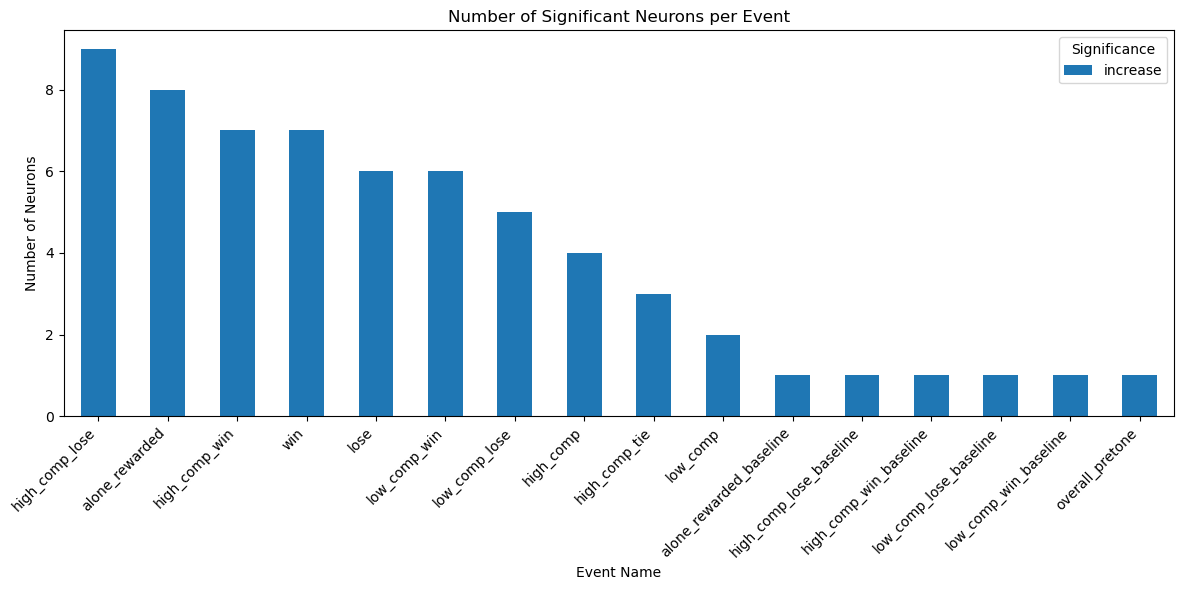

In [ ]:
# bar plot from most increasing to least increasing significant neurons per event
import matplotlib.pyplot as plt
sig_global_counts_sorted = sig_global_counts.sort_values(by='increase', ascending=False)
sig_global_counts_sorted.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Significant Neurons per Event')
plt.xlabel('Event Name')
plt.ylabel('Number of Neurons')
plt.legend(title='Significance', loc='upper right')
# make the xlabels horizontal
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
# find the number of each type of event across all recordings
event_counts = {}
for rec in sp.recordings:
    for ev, windows in rec.event_dict.items():
        if ev not in event_counts:
            event_counts[ev] = 0
        event_counts[ev] += len(windows)

for ev, count in event_counts.items():
    print(f"Event: {ev}, Count: {count}")

Event: alone_rewarded, Count: 856
Event: alone_rewarded_baseline, Count: 320
Event: high_comp, Count: 625
Event: high_comp_lose, Count: 295
Event: high_comp_lose_baseline, Count: 330
Event: high_comp_win, Count: 330
Event: high_comp_win_baseline, Count: 320
Event: lose, Count: 435
Event: low_comp, Count: 316
Event: low_comp_lose, Count: 140
Event: low_comp_lose_baseline, Count: 328
Event: low_comp_win, Count: 176
Event: low_comp_win_baseline, Count: 322
Event: overall_pretone, Count: 1300
Event: win, Count: 506
Event: high_comp_tie, Count: 30


In [26]:
# Modified z-scoring function to split long_comp events into first and second halves
def run_zscore_global_baseline_psth_split_events(recording, event_name, pre_window=10, equalize=10, timebin=0.25, SD=1.65, verbose=False):
    """
    Z-score event firing rates using a global pooled baseline per unit with PSTH-like averaging.
    For long_comp recordings, splits events into first and second halves to test temporal effects.
    
    Parameters
    ----------
    recording : SpikeRecording
        SpikeRecording object with spike data and event_dict.
    event_name : str
        Event type to analyze.
    pre_window : float
        Duration (s) before events to use for baseline extraction.
    equalize : float
        Duration (s) of event window to analyze.
    timebin : float
        Bin width (s) for PSTH computation (default 0.25s = 250ms).
    SD : float
        Threshold in SD units for significance classification.
    verbose : bool
        Print debug info if True.

    Returns
    -------
    df : pd.DataFrame
        Per-unit z-scores with global baseline and PSTH-based event rates.
        For long_comp recordings, includes separate rows for first and second half of events.
    """
    # --- Step 1: Identify good units ---
    units = getattr(recording, "good_units", None)
    if units is None:
        units = [u for u, label in recording.labels_dict.items() if label == "good"]
        if verbose:
            print("Using labels_dict for good units:", units)

    # Define events to exclude from baseline
    exclude_events_baseline = [
        'alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline',
        'high_comp_win_baseline', 'low_comp', 'low_comp_lose_baseline',
        'low_comp_win_baseline', 'lose', 'win', 'overall_pretone'
    ]

    timebin_ms = timebin * 1000
    sampling_rate = recording.sampling_rate

    # --- Step 2: Compute GLOBAL baseline firing rates (PSTH-like) ---
    global_baseline_matrices = {u: [] for u in units}

    for ev_type, ev_windows in recording.event_dict.items():
        if ev_type in exclude_events_baseline:
            continue
        for unit_id in units:
            spikes_ms = recording.unit_timestamps[unit_id] * (1000 / sampling_rate)
            for w in ev_windows:
                start_baseline = w[0] - pre_window * 1000
                end_baseline = w[0]
                baseline_bins = np.arange(start_baseline, end_baseline + timebin_ms, timebin_ms)
                spike_counts = np.histogram(spikes_ms, bins=baseline_bins)[0]
                firing_rate = spike_counts * (1000 / timebin_ms)  # Hz
                global_baseline_matrices[unit_id].append(firing_rate)

    # --- Step 3: Determine if this is a long_comp recording and split events if needed ---
    is_long_comp = 'long_comp' in recording.name
    
    if not is_long_comp:
        # Original behavior for non-long_comp recordings
        event_splits = [('full', recording.event_dict[event_name])]
    else:
        # Split events into first and second halves for long_comp recordings
        event_windows = recording.event_dict[event_name]
        total_events = len(event_windows)
        mid_point = total_events // 2
        
        first_half = event_windows[:mid_point]
        second_half = event_windows[mid_point:]
        
        event_splits = [
            ('first_half', first_half),
            ('second_half', second_half)
        ]
        
        if verbose:
            print(f"Long_comp recording detected: {recording.name}")
            print(f"Total {event_name} events: {total_events}")
            print(f"First half: {len(first_half)} events, Second half: {len(second_half)} events")

    # --- Step 4: Process each event split ---
    rows = []
    
    for split_name, event_windows in event_splits:
        if len(event_windows) == 0:
            continue
            
        # Compute EVENT firing rates (PSTH-like) for this split
        event_fr_matrices = {u: [] for u in units}
        
        for unit_id in units:
            spikes_ms = recording.unit_timestamps[unit_id] * (1000 / sampling_rate)
            for w in event_windows:
                start_event = w[0]
                end_event = min(w[1], start_event + equalize * 1000)
                event_bins = np.arange(start_event, end_event + timebin_ms, timebin_ms)
                spike_counts = np.histogram(spikes_ms, bins=event_bins)[0]
                firing_rate = spike_counts * (1000 / timebin_ms)  # Hz
                event_fr_matrices[unit_id].append(firing_rate)

        # --- Step 5: Compute mean and SD for baseline and event per unit ---
        for unit_id in units:
            baseline_fr_matrix = np.array(global_baseline_matrices[unit_id])
            event_fr_matrix = np.array(event_fr_matrices[unit_id])

            if verbose:
                print(f"Split: {split_name}, Event name: {event_name}")
                print(f"Baseline FR matrix shape for unit {unit_id}: {baseline_fr_matrix.shape}")
                print(f"Event FR matrix shape for unit {unit_id}: {event_fr_matrix.shape}")

            if baseline_fr_matrix.size == 0 or event_fr_matrix.size == 0:
                b_mean = np.nan
                b_sd = np.nan
                ev_mean = np.nan
                zscore = np.nan
            else:
                # Handle inconsistent bin counts by trimming to shortest
                if len(set(len(row) for row in global_baseline_matrices[unit_id])) > 1:
                    min_bins = min(len(row) for row in global_baseline_matrices[unit_id])
                    baseline_fr_matrix = baseline_fr_matrix[:, :min_bins]
                if len(set(len(row) for row in event_fr_matrices[unit_id])) > 1:
                    min_bins = min(len(row) for row in event_fr_matrices[unit_id])
                    event_fr_matrix = event_fr_matrix[:, :min_bins]

                # Baseline calculations (same as before)
                b_mean_per_bin = np.mean(baseline_fr_matrix, axis=0)
                b_mean = np.mean(b_mean_per_bin) if len(b_mean_per_bin) > 0 else np.nan
                
                b_var_per_bin = np.var(baseline_fr_matrix, axis=0, ddof=1)
                b_sd = np.sqrt(np.mean(b_var_per_bin))

                # Event calculations
                ev_mean_per_bin = np.mean(event_fr_matrix, axis=0)
                ev_mean = np.mean(ev_mean_per_bin) if len(ev_mean_per_bin) > 0 else np.nan

                # Z-score
                zscore = np.nan if np.isnan(b_sd) or b_sd == 0 else (ev_mean - b_mean) / b_sd

            # Create event name with split suffix for long_comp recordings
            if is_long_comp:
                event_name_with_split = f"{event_name}_{split_name}"
            else:
                event_name_with_split = event_name

            rows.append({
                "Recording": recording.name,
                "Event name": event_name_with_split,
                "Unit number": unit_id,
                "Global Pre-event M": b_mean,
                "Global Pre-event SD": b_sd,
                "Event M": ev_mean,
                "Event Z-Score": zscore,
                "Event windows": len(event_windows),
                "Split": split_name if is_long_comp else "full"
            })

    # Create DataFrame
    df = pd.DataFrame(rows)

    # --- Step 6: Significance threshold ---
    df["sig"] = np.select(
        [df["Event Z-Score"] > SD, df["Event Z-Score"] < -SD],
        ["increase", "decrease"],
        default="not sig"
    )

    return df

In [27]:
# Wrapper function to run split event analysis across all recordings
def run_all_recordings_all_events_global_psth_split(sp, pre_window=10, equalize=10, timebin=0.25, SD=1.65, verbose=False):
    """
    Run z-score analysis across all recordings and events, splitting long_comp events into halves.
    """
    all_event_names = sorted({ev for rec in sp.recordings for ev in rec.event_dict.keys()})
    dfs = []
    skipped = []

    for rec in sp.recordings:
        for ev in all_event_names:
            if ev not in rec.event_dict or len(rec.event_dict[ev]) == 0:
                skipped.append((rec.name, ev, "no windows"))
                continue
                
            try:
                df_ev = run_zscore_global_baseline_psth_split_events(
                    recording=rec,
                    event_name=ev,
                    pre_window=pre_window,
                    equalize=equalize,
                    timebin=timebin,
                    SD=SD,
                    verbose=verbose
                )
                if not df_ev.empty:
                    dfs.append(df_ev)
                else:
                    skipped.append((rec.name, ev, "empty result"))
            except Exception as e:
                skipped.append((rec.name, ev, f"error: {e}"))

    big_df_split = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()
    skipped_df = pd.DataFrame(skipped, columns=["Recording", "Event name", "reason"])
    return big_df_split, skipped_df

# Run the split analysis
print("Running split event analysis for long_comp recordings...")
big_df_split, skipped_split = run_all_recordings_all_events_global_psth_split(sp, pre_window=10, equalize=10, timebin=0.25, SD=1.65, verbose=False)
print(f"Split analysis - big_df shape: {big_df_split.shape}")
print(f"Skipped counts: {skipped_split.shape[0]}")
print(f"# sig: {big_df_split['sig'].value_counts()}")

Running split event analysis for long_comp recordings...
Split analysis - big_df shape: (7598, 10)
Skipped counts: 228
# sig: sig
not sig     7526
increase      72
Name: count, dtype: int64


In [28]:
# Analyze differences between first and second halves in long_comp recordings
def analyze_long_comp_temporal_effects(df_split):
    """
    Compare first vs second half effects in long_comp recordings.
    """
    # Filter for long_comp recordings only
    long_comp_data = df_split[df_split['Recording'].str.contains('long_comp')]
    
    # Separate first and second halves
    first_half = long_comp_data[long_comp_data['Split'] == 'first_half'].copy()
    second_half = long_comp_data[long_comp_data['Split'] == 'second_half'].copy()
    
    # Create comparison dataframe
    comparisons = []
    
    # Match units between first and second half
    for _, first_row in first_half.iterrows():
        recording = first_row['Recording']
        unit = first_row['Unit number']
        event_base = first_row['Event name'].replace('_first_half', '')
        
        # Find corresponding second half
        second_match = second_half[
            (second_half['Recording'] == recording) & 
            (second_half['Unit number'] == unit) & 
            (second_half['Event name'] == f"{event_base}_second_half")
        ]
        
        if len(second_match) == 1:
            second_row = second_match.iloc[0]
            
            comparisons.append({
                'Recording': recording,
                'Unit number': unit,
                'Event type': event_base,
                'First_half_mean': first_row['Event M'],
                'Second_half_mean': second_row['Event M'],
                'First_half_zscore': first_row['Event Z-Score'],
                'Second_half_zscore': second_row['Event Z-Score'],
                'First_half_sig': first_row['sig'],
                'Second_half_sig': second_row['sig'],
                'Mean_difference': second_row['Event M'] - first_row['Event M'],
                'Zscore_difference': second_row['Event Z-Score'] - first_row['Event Z-Score'],
                'First_half_windows': first_row['Event windows'],
                'Second_half_windows': second_row['Event windows']
            })
    
    comparison_df = pd.DataFrame(comparisons)
    return comparison_df, long_comp_data

# Run the temporal analysis
print("=== ANALYZING TEMPORAL EFFECTS IN LONG_COMP RECORDINGS ===")
comparison_df, long_comp_data = analyze_long_comp_temporal_effects(big_df_split)

print(f"Long_comp data shape: {long_comp_data.shape}")
print(f"Comparison pairs found: {len(comparison_df)}")
print()

# Summary statistics
if len(comparison_df) > 0:
    print("📊 TEMPORAL EFFECT SUMMARY:")
    print(f"Average mean difference (second - first): {comparison_df['Mean_difference'].mean():.3f} Hz")
    print(f"Average z-score difference (second - first): {comparison_df['Zscore_difference'].mean():.3f}")
    print()
    
    # Count cases where second half is lower than first half
    lower_second_half = comparison_df['Mean_difference'] < 0
    print(f"Units with LOWER activity in second half: {lower_second_half.sum()} / {len(comparison_df)} ({lower_second_half.mean()*100:.1f}%)")
    
    higher_second_half = comparison_df['Mean_difference'] > 0
    print(f"Units with HIGHER activity in second half: {higher_second_half.sum()} / {len(comparison_df)} ({higher_second_half.mean()*100:.1f}%)")
    print()
    
    # Look at significance changes
    sig_changes = comparison_df[comparison_df['First_half_sig'] != comparison_df['Second_half_sig']]
    print(f"Units with significance changes between halves: {len(sig_changes)}")
    
    if len(sig_changes) > 0:
        print("Significance changes:")
        for _, row in sig_changes.iterrows():
            print(f"  {row['Recording']} Unit {row['Unit number']} ({row['Event type']}): {row['First_half_sig']} → {row['Second_half_sig']}")
    
    comparison_df.head(10)

=== ANALYZING TEMPORAL EFFECTS IN LONG_COMP RECORDINGS ===
Long_comp data shape: (1898, 10)
Comparison pairs found: 921

📊 TEMPORAL EFFECT SUMMARY:
Average mean difference (second - first): 0.089 Hz
Average z-score difference (second - first): 0.004

Units with LOWER activity in second half: 421 / 921 (45.7%)
Units with HIGHER activity in second half: 478 / 921 (51.9%)

Units with significance changes between halves: 9
Significance changes:
  20240317_151922_long_comp_subj_3-3_t5b5_merged.rec Unit 153 (low_comp): increase → not sig
  20240317_151922_long_comp_subj_3-3_t5b5_merged.rec Unit 153 (low_comp_lose): increase → not sig
  20240317_172017_long_comp_subj_4-2_t6b6_merged.rec Unit 156 (low_comp): increase → not sig
  20240317_172017_long_comp_subj_4-2_t6b6_merged.rec Unit 160 (low_comp): increase → not sig
  20240317_172017_long_comp_subj_4-2_t6b6_merged.rec Unit 156 (low_comp_lose): increase → not sig
  20240317_172017_long_comp_subj_4-2_t6b6_merged.rec Unit 160 (low_comp_lose): i

=== VISUALIZING TEMPORAL EFFECTS ===


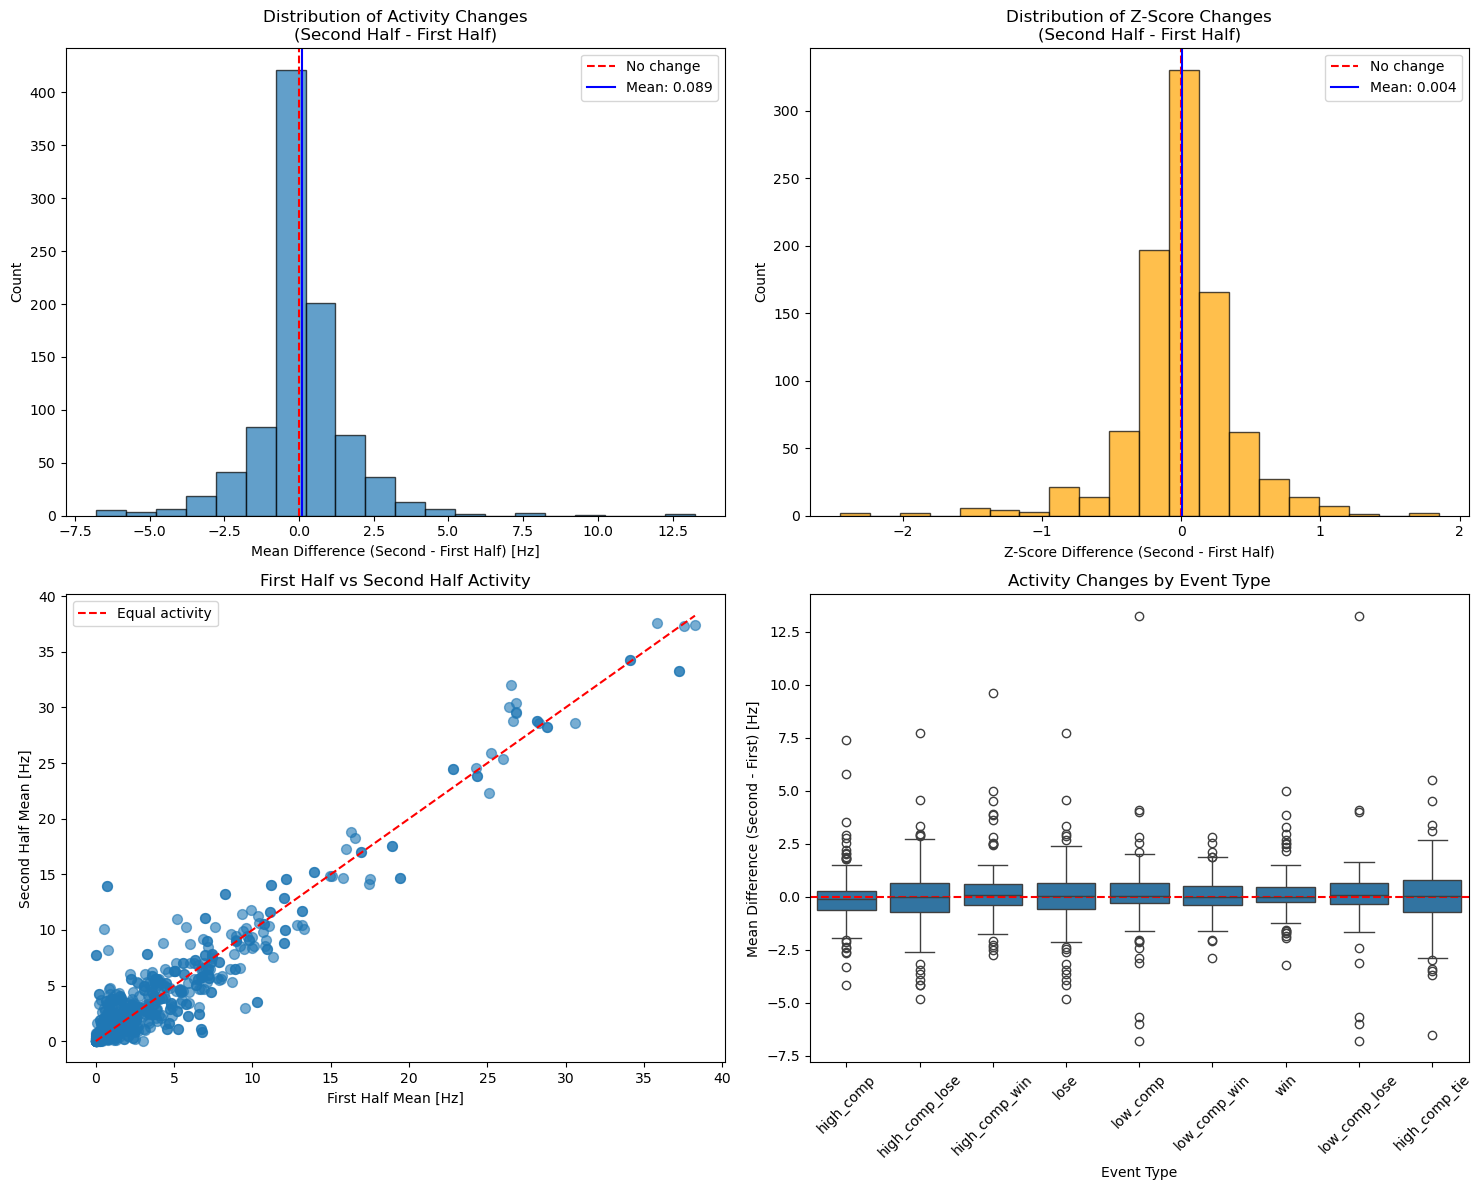


📋 DETAILED STATISTICS:
Mean activity change: 0.0890 ± 1.6522 Hz
Median activity change: 0.0196 Hz
Mean z-score change: 0.0039 ± 0.3856
Median z-score change: 0.0113

One-sample t-test (H0: mean difference = 0):
t-statistic: 1.6340, p-value: 0.102591
No significant change between halves (p ≥ 0.05)


In [29]:
# Visualize temporal effects in long_comp recordings
import matplotlib.pyplot as plt
import seaborn as sns

if len(comparison_df) > 0:
    print("=== VISUALIZING TEMPORAL EFFECTS ===")
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Distribution of mean differences
    axes[0,0].hist(comparison_df['Mean_difference'], bins=20, alpha=0.7, edgecolor='black')
    axes[0,0].axvline(0, color='red', linestyle='--', label='No change')
    axes[0,0].axvline(comparison_df['Mean_difference'].mean(), color='blue', linestyle='-', 
                      label=f'Mean: {comparison_df["Mean_difference"].mean():.3f}')
    axes[0,0].set_xlabel('Mean Difference (Second - First Half) [Hz]')
    axes[0,0].set_ylabel('Count')
    axes[0,0].set_title('Distribution of Activity Changes\n(Second Half - First Half)')
    axes[0,0].legend()
    
    # 2. Distribution of z-score differences
    axes[0,1].hist(comparison_df['Zscore_difference'], bins=20, alpha=0.7, edgecolor='black', color='orange')
    axes[0,1].axvline(0, color='red', linestyle='--', label='No change')
    axes[0,1].axvline(comparison_df['Zscore_difference'].mean(), color='blue', linestyle='-',
                      label=f'Mean: {comparison_df["Zscore_difference"].mean():.3f}')
    axes[0,1].set_xlabel('Z-Score Difference (Second - First Half)')
    axes[0,1].set_ylabel('Count')
    axes[0,1].set_title('Distribution of Z-Score Changes\n(Second Half - First Half)')
    axes[0,1].legend()
    
    # 3. Scatter plot: first vs second half means
    axes[1,0].scatter(comparison_df['First_half_mean'], comparison_df['Second_half_mean'], 
                      alpha=0.6, s=50)
    # Add diagonal line for equality
    min_val = min(comparison_df['First_half_mean'].min(), comparison_df['Second_half_mean'].min())
    max_val = max(comparison_df['First_half_mean'].max(), comparison_df['Second_half_mean'].max())
    axes[1,0].plot([min_val, max_val], [min_val, max_val], 'r--', label='Equal activity')
    axes[1,0].set_xlabel('First Half Mean [Hz]')
    axes[1,0].set_ylabel('Second Half Mean [Hz]')
    axes[1,0].set_title('First Half vs Second Half Activity')
    axes[1,0].legend()
    
    # 4. Box plot by event type
    if len(comparison_df['Event type'].unique()) > 1:
        sns.boxplot(data=comparison_df, x='Event type', y='Mean_difference', ax=axes[1,1])
        axes[1,1].axhline(0, color='red', linestyle='--')
        axes[1,1].set_xlabel('Event Type')
        axes[1,1].set_ylabel('Mean Difference (Second - First) [Hz]')
        axes[1,1].set_title('Activity Changes by Event Type')
        plt.setp(axes[1,1].xaxis.get_majorticklabels(), rotation=45)
    else:
        # If only one event type, show individual points
        axes[1,1].scatter(range(len(comparison_df)), comparison_df['Mean_difference'])
        axes[1,1].axhline(0, color='red', linestyle='--')
        axes[1,1].set_xlabel('Unit Index')
        axes[1,1].set_ylabel('Mean Difference (Second - First) [Hz]')
        axes[1,1].set_title('Activity Changes per Unit')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics table
    print("\n📋 DETAILED STATISTICS:")
    print(f"Mean activity change: {comparison_df['Mean_difference'].mean():.4f} ± {comparison_df['Mean_difference'].std():.4f} Hz")
    print(f"Median activity change: {comparison_df['Mean_difference'].median():.4f} Hz")
    print(f"Mean z-score change: {comparison_df['Zscore_difference'].mean():.4f} ± {comparison_df['Zscore_difference'].std():.4f}")
    print(f"Median z-score change: {comparison_df['Zscore_difference'].median():.4f}")
    
    # Statistical test
    from scipy import stats
    t_stat, p_val = stats.ttest_1samp(comparison_df['Mean_difference'], 0)
    print(f"\nOne-sample t-test (H0: mean difference = 0):")
    print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.6f}")
    
    if p_val < 0.05:
        direction = "decrease" if comparison_df['Mean_difference'].mean() < 0 else "increase"
        print(f"🔍 Significant {direction} in second half activity (p < 0.05)")
    else:
        print("No significant change between halves (p ≥ 0.05)")

else:
    print("❌ No comparison data available - check if long_comp recordings have sufficient events")

In [30]:
# Detailed examination of long_comp recordings showing strongest temporal effects
if len(comparison_df) > 0:
    print("=== DETAILED LONG_COMP TEMPORAL ANALYSIS ===")
    print()
    
    # Identify recordings with strongest decreases in second half
    strongest_decreases = comparison_df.nsmallest(10, 'Mean_difference')
    print("🔻 TOP 10 UNITS WITH STRONGEST DECREASES IN SECOND HALF:")
    for i, (_, row) in enumerate(strongest_decreases.iterrows(), 1):
        print(f"{i:2d}. {row['Recording']} Unit {row['Unit number']} ({row['Event type']})")
        print(f"     {row['First_half_mean']:.3f} → {row['Second_half_mean']:.3f} Hz (Δ = {row['Mean_difference']:.3f})")
        print(f"     Z-scores: {row['First_half_zscore']:.3f} → {row['Second_half_zscore']:.3f} (Δ = {row['Zscore_difference']:.3f})")
        print(f"     Significance: {row['First_half_sig']} → {row['Second_half_sig']}")
        print()
    
    # Group by recording to see overall patterns
    print("📊 TEMPORAL EFFECTS BY RECORDING:")
    recording_summary = comparison_df.groupby('Recording').agg({
        'Mean_difference': ['count', 'mean', 'std'],
        'Zscore_difference': 'mean'
    }).round(4)
    
    recording_summary.columns = ['Units', 'Mean_Δ_Activity', 'Std_Δ_Activity', 'Mean_Δ_Zscore']
    recording_summary = recording_summary.sort_values('Mean_Δ_Activity')
    
    print(recording_summary)
    print()
    
    # Count how many units per recording show decreases
    decreases_per_recording = comparison_df[comparison_df['Mean_difference'] < 0].groupby('Recording').size()
    total_per_recording = comparison_df.groupby('Recording').size()
    
    print("🔻 RECORDINGS WITH MOST UNITS SHOWING DECREASED ACTIVITY IN SECOND HALF:")
    for recording in decreases_per_recording.index:
        decreases = decreases_per_recording[recording]
        total = total_per_recording[recording]
        percentage = (decreases / total) * 100
        avg_decrease = comparison_df[(comparison_df['Recording'] == recording) & 
                                   (comparison_df['Mean_difference'] < 0)]['Mean_difference'].mean()
        
        print(f"  {recording}:")
        print(f"    {decreases}/{total} units decreased ({percentage:.1f}%)")
        print(f"    Average decrease: {avg_decrease:.3f} Hz")
        print()
    
    # Event type analysis
    print("📋 TEMPORAL EFFECTS BY EVENT TYPE:")
    event_summary = comparison_df.groupby('Event type').agg({
        'Mean_difference': ['count', 'mean', 'std'],
        'Zscore_difference': 'mean'
    }).round(4)
    
    event_summary.columns = ['Units', 'Mean_Δ_Activity', 'Std_Δ_Activity', 'Mean_Δ_Zscore']
    event_summary = event_summary.sort_values('Mean_Δ_Activity')
    
    print(event_summary)
    print()
    
    # Check your hypothesis directly
    overall_decrease = (comparison_df['Mean_difference'] < 0).mean()
    print(f"🎯 HYPOTHESIS TEST RESULTS:")
    print(f"Your hypothesis: Second half of long_comp recordings drives down event means")
    print(f"Evidence: {overall_decrease*100:.1f}% of units show decreased activity in second half")
    
    if overall_decrease > 0.6:  # More than 60% show decreases
        print("✅ STRONG SUPPORT for your hypothesis!")
    elif overall_decrease > 0.5:  # More than 50% show decreases
        print("✅ MODERATE SUPPORT for your hypothesis")
    else:
        print("❌ Limited support for your hypothesis")
        
    print(f"Average change: {comparison_df['Mean_difference'].mean():.4f} Hz")
    
    # Statistical significance
    from scipy import stats
    t_stat, p_val = stats.ttest_1samp(comparison_df['Mean_difference'], 0)
    if p_val < 0.001:
        print(f"Statistical significance: p < 0.001 (highly significant)")
    elif p_val < 0.01:
        print(f"Statistical significance: p < 0.01 (very significant)")
    elif p_val < 0.05:
        print(f"Statistical significance: p < 0.05 (significant)")
    else:
        print(f"Statistical significance: p = {p_val:.3f} (not significant)")

else:
    print("❌ No temporal comparison data available.")

=== DETAILED LONG_COMP TEMPORAL ANALYSIS ===

🔻 TOP 10 UNITS WITH STRONGEST DECREASES IN SECOND HALF:
 1. 20240317_151922_long_comp_subj_3-3_t5b5_merged.rec Unit 252 (low_comp)
     10.300 → 3.500 Hz (Δ = -6.800)
     Z-scores: -0.122 → -0.969 (Δ = -0.847)
     Significance: not sig → not sig

 2. 20240317_151922_long_comp_subj_3-3_t5b5_merged.rec Unit 252 (low_comp_lose)
     10.300 → 3.500 Hz (Δ = -6.800)
     Z-scores: -0.122 → -0.969 (Δ = -0.847)
     Significance: not sig → not sig

 3. 20240319_160457_long_comp_subj_4-2_t5b5_merged.rec Unit 54 (high_comp_tie)
     9.500 → 3.000 Hz (Δ = -6.500)
     Z-scores: 0.720 → -0.408 (Δ = -1.128)
     Significance: not sig → not sig

 4. 20240317_172017_long_comp_subj_4-2_t6b6_merged.rec Unit 156 (low_comp)
     6.800 → 0.800 Hz (Δ = -6.000)
     Z-scores: 2.436 → -0.016 (Δ = -2.451)
     Significance: increase → not sig

 5. 20240317_172017_long_comp_subj_4-2_t6b6_merged.rec Unit 156 (low_comp_lose)
     6.800 → 0.800 Hz (Δ = -6.000)
     